# Detección basada en densidad

Este enfoque se basa en la idea de que los puntos de datos que están en áreas de baja densidad en el espacio de características son probablemente outliers. Es un enfoque para detectar outliers que se basa en la idea de que los puntos de datos que están en áreas de baja densidad en el espacio de características son probablemente outliers. Estos modelos son más robustos a los valores atípicos en los datos, ya que no dependen de una métrica de distancia o de una hipótesis previa sobre la forma de los datos.

Un ejemplo de un algoritmo de detección basado en densidad es el Algoritmo de detección de outliers basado en Gaussianas (GAODE, por sus siglas en inglés). Este algoritmo funciona asignando probabilidades a cada punto de datos en función de una hipótesis previa sobre la forma de los datos. La hipótesis previa en este caso es que los datos provienen de una distribución Gaussiana. Luego, se puede calcular la probabilidad de que un punto de datos particular sea un outlier en función de la probabilidad asignada a ese punto.

Para implementar GAODE, primero se estima un modelo Gaussiano para cada característica en los datos. Luego, para cada punto de datos, se calcula la probabilidad de que ese punto sea generado por cada uno de los modelos Gaussianos. Finalmente, se asigna una probabilidad total a cada punto de datos como la producto de las probabilidades de cada característica y se utiliza un umbral para clasificar los puntos de datos como outliers o no outliers.

Este enfoque es más robusto que la detección basada en distancias, ya que no requiere la identificación previa de una métrica de distancia o la hipótesis previa de que los datos siguen una forma específica. Sin embargo, es importante tener en cuenta que esta técnica puede ser más compleja de implementar que otras técnicas de detección basadas en distancias o en otros enfoques.

#Librerías necesarias

- Numpy
- Sci-kit Learn
- Matblotlib

In [1]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 42.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports de las librerías

Numpy como np

Pyplot de matplotlib como plt

De neighbors que viene de sklearn importamos LocalOutlierFactor

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

## Generar datos sintéticos para el análisis

1. numpy configurará la generación de datos random con una semilla 42
2. generaré datos de 100 filas por dos columnas
3. generaré datos que funcionarán de outliers entre -4 y 4 de 20 filas y dos columnas
4. concatenamos en x las matrices que ya habíamos hecho, 
  - en primer lugar concatenamos x desplazado en 2 y x desplazado en -2 (en x y y) y concatenamos los outliers 
  - esto va a generar una dispersión atípica de los valores outliers
    - no importa el orden en que sean concatenados mientras estén en un solo objeto


In [8]:
# 1
np.random.seed(42)
# 2
X = 0.3 * np.random.randn(100, 2)
# 3
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
# 4
X = np.r_[X + 2, X - 2, X_outliers]

## Ajustar el modelo de detección de outliers

1. crea un objeto del modelo de detección basado en densidad llamado LocalOutlierFactor
  - Un punto es considerado un outlier si su densidad de vecinos es muy baja en comparación con la densidad de los vecinos de los demás puntos
  - La variable n_neighbors se utiliza para especificar el número de vecinos más cercanos que se utilizarán para calcular la densidad
3. se ajusta el modelo de detección dando como parámetros el conjunto X que recordando el conjunto original se transformó en x+2 y x-2 dentro de x

In [9]:
# 1
clf = LocalOutlierFactor(n_neighbors=10)
# 2
y_pred = clf.fit_predict(X)

## Graficar resultados

1. se crea un objeto colors donde se etiquetarán de azul #377EB8 los outliers y de naranja #FF7F00 los datos que son representativos.
2. Grafica primera columna en x y segunda columna en Y
  - Usa colors para asignar colores a los puntos y_pred contiene las etiquetas de predicción devueltas por el modelo LocalOutlierFactor.
  - La expresión `color=colors[(y_pred + 1) // 2]` se utiliza para asignar un color a cada punto en función de su etiqueta de predicción. 
    - Si un punto es considerado un outlier (y_pred = -1), se le asigna el primer color de la lista colors.
    - Si no es un outlier (y_pred = 1), se le asigna el segundo color. 
  - La expresión (y_pred + 1) // 2 se utiliza para mapear los valores de y_pred a los índices de los colores en la lista.
3. Se delimitan los ejes de la gráfica desde -5 a 5 en x y en y para alcanzar a graficar los puntos ya que recordando todo se realiza desde -4 a 4 tanto en X como en Y
4. Se grafica

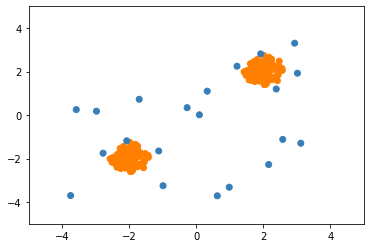

In [10]:
# 1
colors = np.array(['#377eb8', '#ff7f00'])
# 2
plt.scatter(X[:, 0], X[:, 1], color=colors[(y_pred + 1) // 2])
# 3
plt.xlim((-5, 5))
plt.ylim((-5, 5))
# 4
plt.show()